# <a id="2">Load packages</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier
import gc

# <a id="2">Set Constants</a>

In [2]:
RFC_METRIC = 'gini'
NUM_ESTIMATORS = 100
NO_JOBS = 4
VALID_SIZE = 0.20
TEST_SIZE = 0.20
NUMBER_KFOLDS = 5
RANDOM_STATE = 2018
MAX_ROUNDS = 1000
EARLY_STOP = 50
OPT_ROUNDS = 1000
VERBOSE_EVAL = 50



# <a id="3">Read the data</a>

In [4]:
data_df = pd.read_csv("D:\Internship\CodeClause\CreditCard/creditcard.csv")
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# <a id="4">Check the data</a>

In [54]:
print("Credit Card Fraud Detection data - rows:", data_df.shape[0], " columns:", data_df.shape[1])

Credit Card Fraud Detection data - rows: 284807  columns: 31


## <a id="41">Glimpse the data</a>



In [55]:
# Glimpse the data
print(data_df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

In [56]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [57]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## <a id="42">Check missing data</a>  

Let's check if there is any missing data.

In [58]:
print("Missing data:")
print(data_df.isnull().sum())



Missing data:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [59]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset.

## <a id="43">Data unbalance</a>

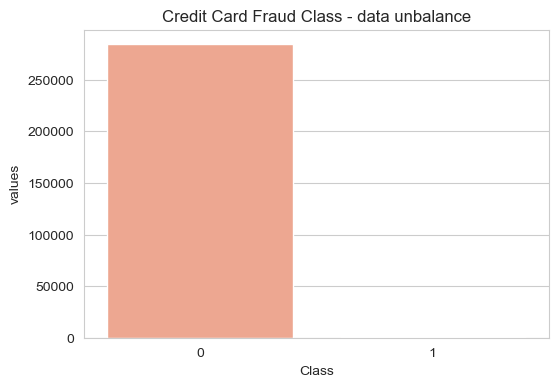

In [60]:
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index, 'values': temp.values})
plt.figure(figsize=(6, 4))
sns.barplot(x='Class', y='values', data=df, palette="Reds")
plt.title('Credit Card Fraud Class - data unbalance')
plt.show()



# <a id="5">Data exploration</a>

## Transactions in time

C:\Users\kaviy\AppData\Local\Temp\ipykernel_13492\3326360826.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\kaviy\AppData\Local\Temp\ipykernel_13492\3326360826.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




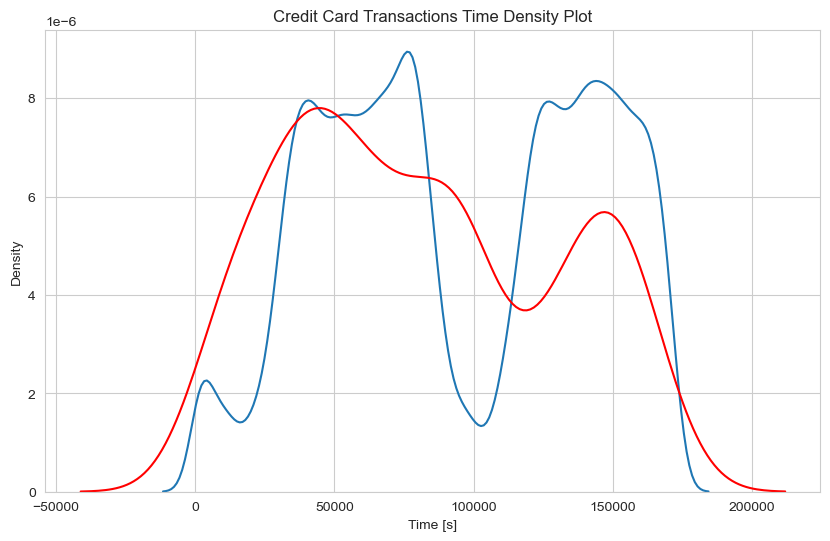

In [61]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

plt.figure(figsize=(10, 6))
sns.distplot(class_0, hist=False, label='Not Fraud')
sns.distplot(class_1, hist=False, label='Fraud', color='red')
plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.show()


## Transactions amount

In [62]:

# Train/Validation/Test split
train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True)
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)



In [63]:
# Features for training
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

## Visualization Functions

In [65]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import itertools

# Function to plot ROC curve
def plot_roc_curve(title, fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.legend(loc='best')
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## <a id="61">RandomForestClassifier</a>


### Define model parameters

Let's set the parameters for the model.

In [66]:
# Random Forest Classifier
clf_rf = RandomForestClassifier(n_jobs=NO_JOBS, random_state=RANDOM_STATE, criterion=RFC_METRIC, n_estimators=NUM_ESTIMATORS)
clf_rf.fit(train_df[predictors], train_df['Class'].values)
preds_rf = clf_rf.predict(valid_df[predictors])
roc_auc_rf = roc_auc_score(valid_df['Class'].values, preds_rf)
print(f'Random Forest AUC: {roc_auc_rf}')



Random Forest AUC: 0.8528641975628091


The most important features are **V17**, **V12**, **V14**, **V10**, **V11**, **V16**.


### Confusion matrix

Let's show a confusion matrix for the results we obtained. 

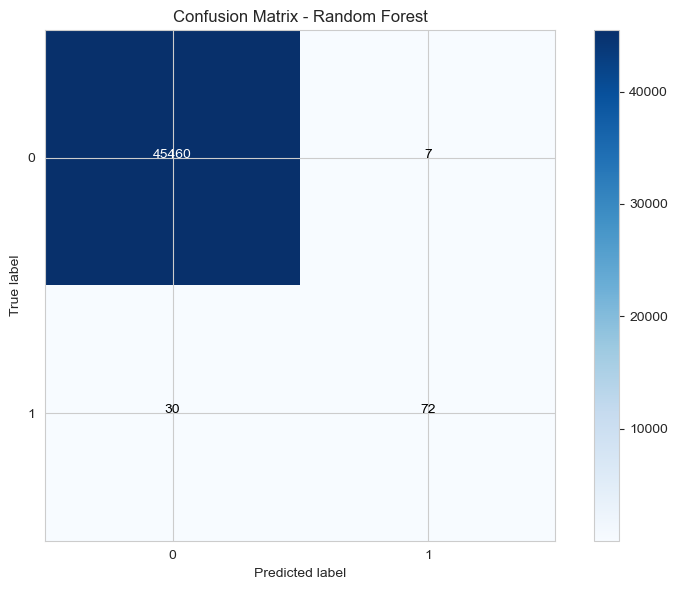

In [67]:
cm_rf = confusion_matrix(valid_df['Class'].values, preds_rf.round())
plot_confusion_matrix(cm_rf, classes=[0, 1], title='Confusion Matrix - Random Forest')

Let's calculate also the ROC-AUC.


### Area under curve

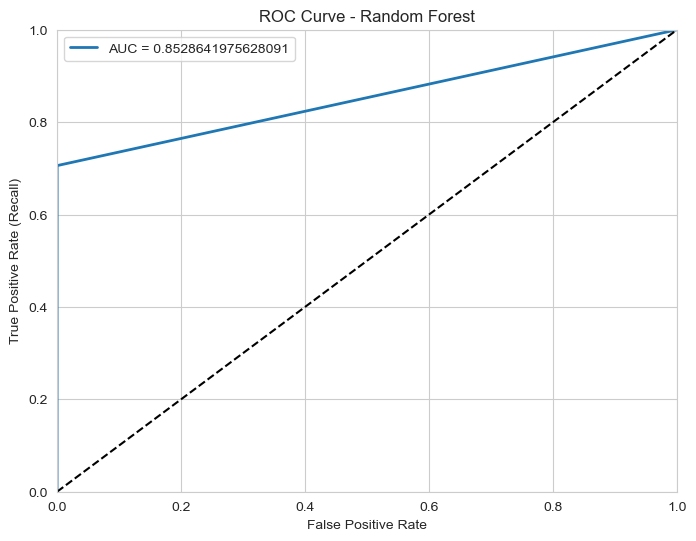

In [68]:
fpr_rf, tpr_rf, _ = roc_curve(valid_df['Class'].values, preds_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plot_roc_curve('ROC Curve - Random Forest', fpr_rf, tpr_rf, label=f'AUC = {roc_auc_rf}')


## <a id="62">AdaBoostClassifier</a>


AdaBoostClassifier stands for Adaptive Boosting Classifier <a href='#8'></a>.

### Prepare the model

Let's set the parameters for the model and initialize the model.

In [69]:
clf_adaboost = AdaBoostClassifier(random_state=RANDOM_STATE, algorithm='SAMME.R', learning_rate=0.8, n_estimators=NUM_ESTIMATORS)
clf_adaboost.fit(train_df[predictors], train_df['Class'].values)
preds_adaboost = clf_adaboost.predict(valid_df[predictors])
roc_auc_adaboost = roc_auc_score(valid_df['Class'].values, preds_adaboost)
print(f'AdaBoost AUC: {roc_auc_adaboost}')



AdaBoost AUC: 0.8332343604519027


### Confusion matrix

Let's visualize the confusion matrix.

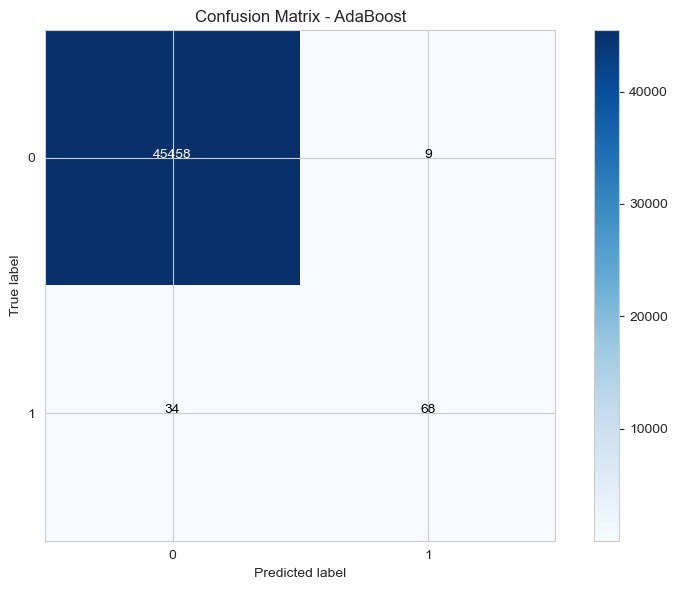

In [70]:
cm_adaboost = confusion_matrix(valid_df['Class'].values, preds_adaboost.round())
plot_confusion_matrix(cm_adaboost, classes=[0, 1], title='Confusion Matrix - AdaBoost')


Let's calculate also the ROC-AUC.


### Area under curve

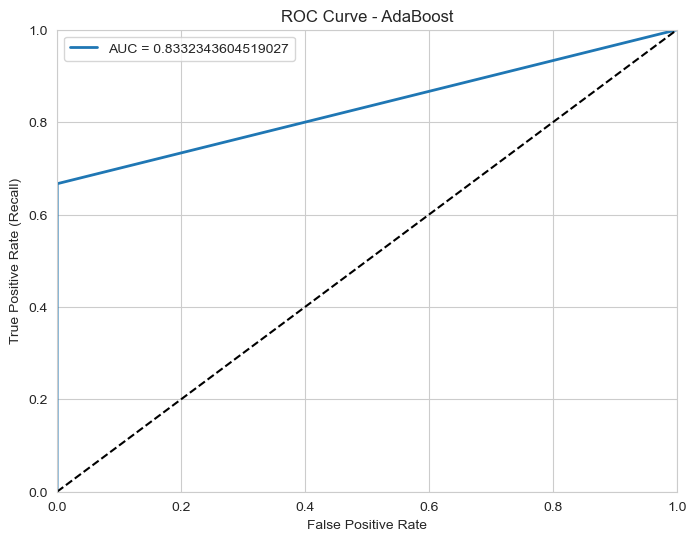

In [71]:
fpr_adaboost, tpr_adaboost, _ = roc_curve(valid_df['Class'].values, preds_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)
plot_roc_curve('ROC Curve - AdaBoost', fpr_adaboost, tpr_adaboost, label=f'AUC = {roc_auc_adaboost}')


## <a id="63">CatBoostClassifier</a>


CatBoostClassifier is a gradient boosting for decision trees algorithm with support for handling categorical data <a href='#8'>[6]</a>.

### Prepare the model

Let's set the parameters for the model and initialize the model.

In [72]:
# CatBoost Classifier
clf_catboost = CatBoostClassifier(iterations=500, learning_rate=0.02, depth=12, eval_metric='AUC', random_seed=RANDOM_STATE, bagging_temperature=0.2, od_type='Iter', metric_period=VERBOSE_EVAL, od_wait=100)
clf_catboost.fit(train_df[predictors], train_df['Class'].values, verbose=True)
preds_catboost = clf_catboost.predict(valid_df[predictors])
roc_auc_catboost = roc_auc_score(valid_df['Class'].values, preds_catboost)
print(f'CatBoost AUC: {roc_auc_catboost}')



0:	total: 516ms	remaining: 4m 17s
50:	total: 30.4s	remaining: 4m 27s
100:	total: 1m	remaining: 3m 59s
150:	total: 1m 30s	remaining: 3m 29s
200:	total: 2m	remaining: 2m 59s
250:	total: 2m 30s	remaining: 2m 28s
300:	total: 2m 59s	remaining: 1m 58s
350:	total: 3m 29s	remaining: 1m 28s
400:	total: 3m 58s	remaining: 58.8s
450:	total: 4m 28s	remaining: 29.2s
499:	total: 4m 58s	remaining: 0us
CatBoost AUC: 0.8577991493075996


### Confusion matrix

Let's visualize the confusion matrix.

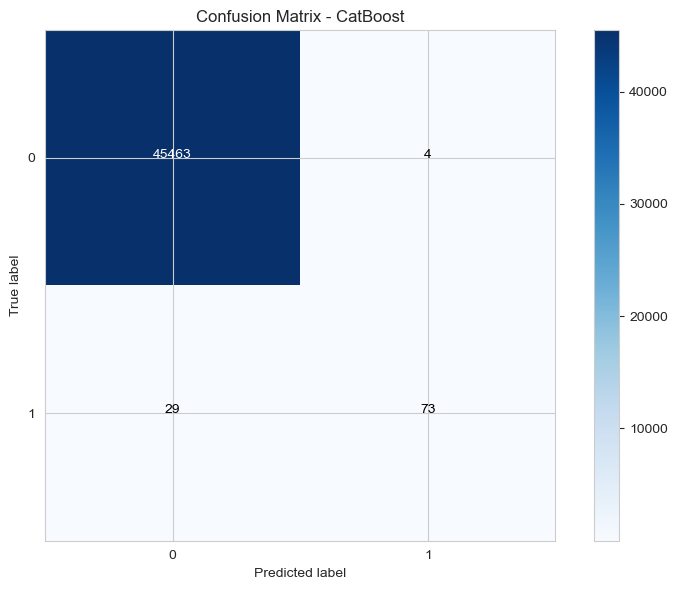

In [73]:

cm_catboost = confusion_matrix(valid_df['Class'].values, preds_catboost.round())
plot_confusion_matrix(cm_catboost, classes=[0, 1], title='Confusion Matrix - CatBoost')



Let's calculate also the ROC-AUC.


### Area under curve

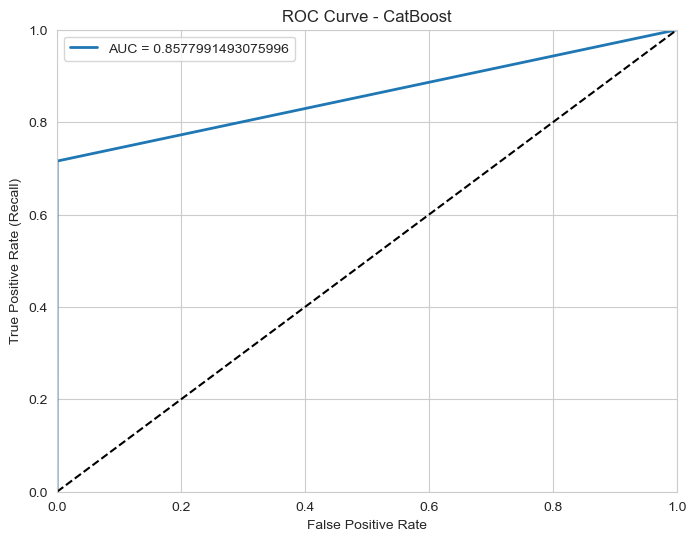

In [74]:
# Plot ROC curve and Confusion Matrix for CatBoost
fpr_catboost, tpr_catboost, _ = roc_curve(valid_df['Class'].values, preds_catboost)
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)
plot_roc_curve('ROC Curve - CatBoost', fpr_catboost, tpr_catboost, label=f'AUC = {roc_auc_catboost}')


## <a id="63">XGBoost</a>

### Prepare the model

We initialize the DMatrix objects for training and validation, starting from the datasets. We also set some of the parameters used for the model tuning.

In [75]:
# XGBoost
dtrain_xgb = xgb.DMatrix(train_df[predictors], train_df['Class'].values)
dvalid_xgb = xgb.DMatrix(valid_df[predictors], valid_df['Class'].values)
dtest_xgb = xgb.DMatrix(test_df[predictors], test_df['Class'].values)
params_xgb = {'objective': 'binary:logistic', 'eta': 0.039, 'silent': True, 'max_depth': 2, 'subsample': 0.8, 'colsample_bytree': 0.9, 'eval_metric': 'auc', 'random_state': RANDOM_STATE}
model_xgb = xgb.train(params_xgb, dtrain_xgb, MAX_ROUNDS, [(dtrain_xgb, 'train'), (dvalid_xgb, 'valid')], early_stopping_rounds=EARLY_STOP, maximize=True, verbose_eval=VERBOSE_EVAL)
preds_xgb = model_xgb.predict(dtest_xgb)
roc_auc_xgb = roc_auc_score(test_df['Class'].values, preds_xgb)
print(f'XGBoost AUC: {roc_auc_xgb}')

[0]	train-auc:0.94070	valid-auc:0.88630


D:\Anaconda\Lib\site-packages\xgboost\core.py:727: FutureWarning:

Pass `evals` as keyword args.

D:\Anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning:

[13:39:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.




[50]	train-auc:0.94200	valid-auc:0.89009
[100]	train-auc:0.97584	valid-auc:0.96685
[150]	train-auc:0.98525	valid-auc:0.97960
[200]	train-auc:0.99279	valid-auc:0.98495
[250]	train-auc:0.99493	valid-auc:0.98352
[258]	train-auc:0.99519	valid-auc:0.98386
XGBoost AUC: 0.9803156765502444


### Confusion matrix

Let's visualize the confusion matrix.

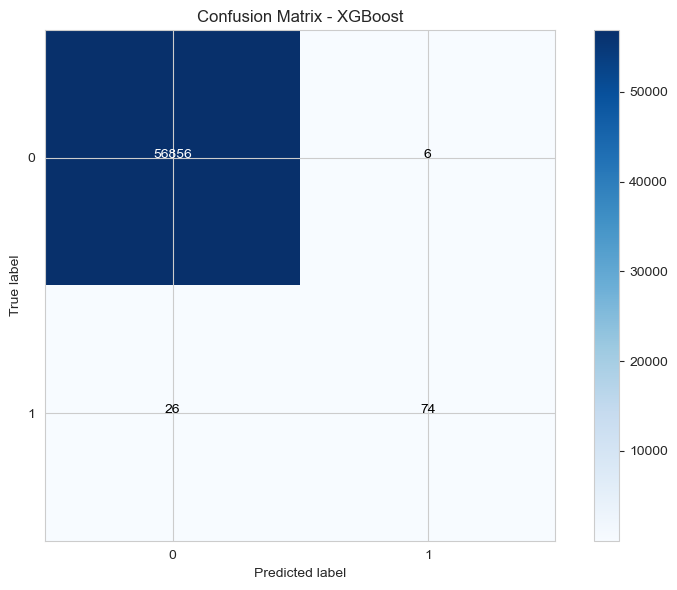

In [76]:
cm_xgb = confusion_matrix(test_df['Class'].values, preds_xgb.round())
plot_confusion_matrix(cm_xgb, classes=[0, 1], title='Confusion Matrix - XGBoost')



### Area under curve

Let's calculate ROC-AUC.

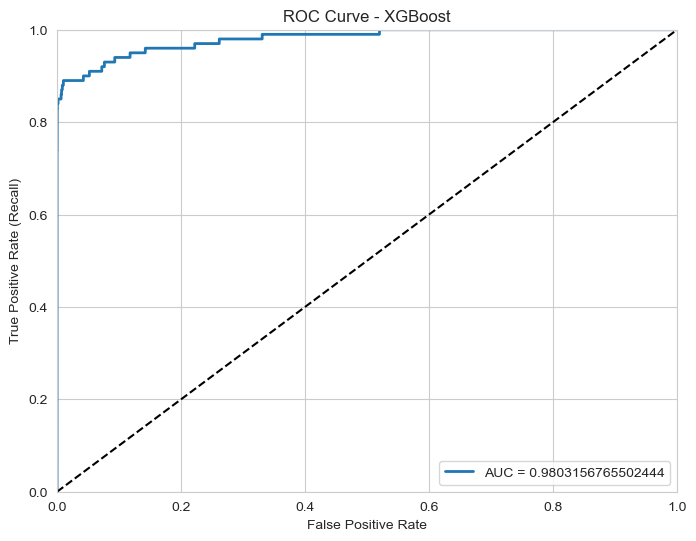

In [77]:

# Plot ROC curve and Confusion Matrix for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(test_df['Class'].values, preds_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plot_roc_curve('ROC Curve - XGBoost', fpr_xgb, tpr_xgb, label=f'AUC = {roc_auc_xgb}')

## <a id="64">LightGBM</a>


Let's continue with another gradient boosting algorithm, LightGBM <a href='#8'>[8]</a> <a href='#8'>[9]</a>.


### Define model parameters

Let's set the parameters for the model. We will use these parameters only for the first lgb model.

### Prepare the model

Let's prepare the model, creating the **Dataset**s data structures from the train and validation sets.

In [78]:
# LightGBM
params_lgb = {'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 'learning_rate': 0.05, 'num_leaves': 7, 'max_depth': 4, 'min_child_samples': 100, 'max_bin': 100, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.7, 'min_child_weight': 0, 'min_split_gain': 0, 'nthread': 8, 'verbose': 0, 'scale_pos_weight': 150}
dtrain_lgb = lgb.Dataset(train_df[predictors].values, label=train_df['Class'].values, feature_name=predictors)
dvalid_lgb = lgb.Dataset(valid_df[predictors].values, label=valid_df['Class'].values, feature_name=predictors)
model_lgb = lgb.train(params_lgb, dtrain_lgb, valid_sets=[dtrain_lgb, dvalid_lgb], valid_names=['train', 'valid'], num_boost_round=MAX_ROUNDS)
preds_lgb = model_lgb.predict(test_df[predictors])
roc_auc_lgb = roc_auc_score(test_df['Class'].values, preds_lgb)
print(f'LightGBM AUC: {roc_auc_lgb}')



# Clean up memory
gc.collect()


LightGBM AUC: 0.9463351623228167


61006

### Confusion matrix

Let's visualize the confusion matrix.

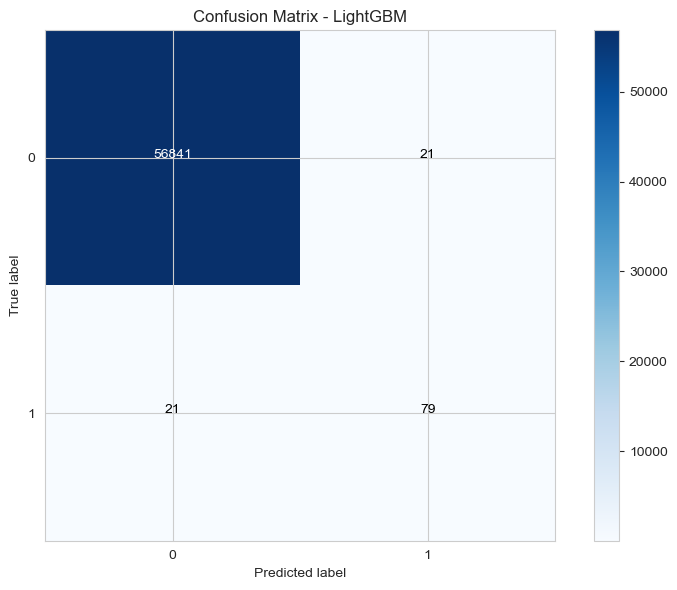

In [79]:
cm_lgb = confusion_matrix(test_df['Class'].values, preds_lgb.round())
plot_confusion_matrix(cm_lgb, classes=[0, 1], title='Confusion Matrix - LightGBM')

### Area under curve

Let's calculate the ROC-AUC score for the prediction.

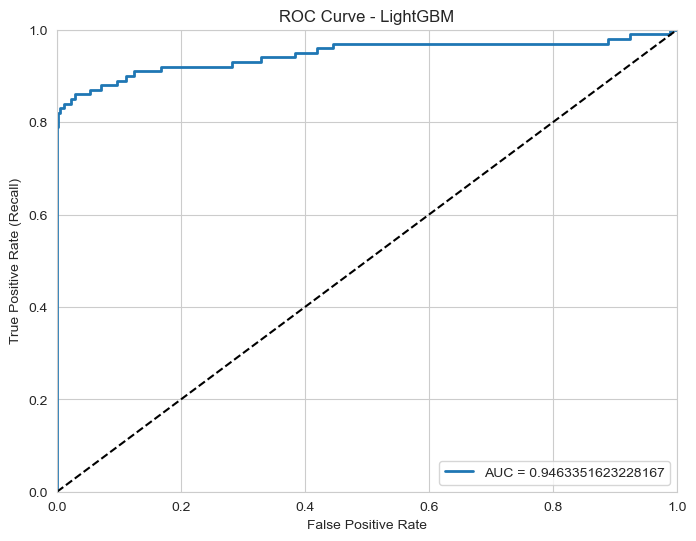

In [80]:
# Plot ROC curve and Confusion Matrix for LightGBM
fpr_lgb, tpr_lgb, _ = roc_curve(test_df['Class'].values, preds_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)
plot_roc_curve('ROC Curve - LightGBM', fpr_lgb, tpr_lgb, label=f'AUC = {roc_auc_lgb}')


## <a id="64">Random Forest Model</a>

ROC AUC Score: 0.8849736203439907
Accuracy: 0.9995435553526912


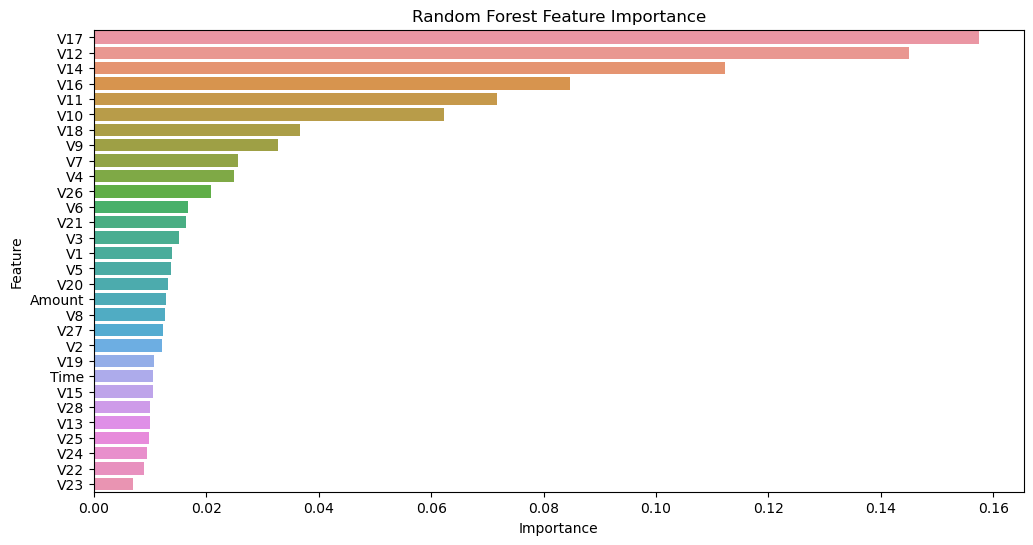

In [6]:
from sklearn.metrics import accuracy_score

# Step 1: Split the data into training and testing sets
X = data_df.drop('Class', axis=1)  # Features
y = data_df['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Step 2: Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=NUM_ESTIMATORS, criterion=RFC_METRIC, n_jobs=NO_JOBS, random_state=RANDOM_STATE)

# Step 3: Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Step 5: Evaluate the model's performance
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'ROC AUC Score: {roc_auc}')
print(f'Accuracy: {accuracy}')

# Additional: Feature Importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
features = features.sort_values(by='Importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Random Forest Feature Importance')
plt.show()


In [8]:
import joblib

model_filename = 'random_forest_model.joblib'
joblib.dump(rf_classifier, model_filename)

print(f'Model saved to {model_filename}')


Model saved to random_forest_model.joblib
